### $M_r$ vs $L$ for bending of unsupported beams
This notebook page plots factored moment resistance, $M_r$, as a function of unsupported length, $L$, for a specific class 1 or class 2 W shape.  It follows CSA S16-09 Section 13.6 (a).  All component curves are plotted, with the limits of applicability of each.

By default, $F_y = 350$ MPa and $\omega_2=1$, but those can be changed.

In [1]:
# standard boilerplate for importing numerical and graphics libraries
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg','pdf')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import library for retreiving structural section properties
import sst
SST = sst.SST()

In [3]:
# material properties
Fy=350.
E=200000.
G=77000.
phi=0.9

In [4]:
# get the properties for the given section
Dsg,B,T,D,W,A,Ix,Sx,Zx,Iy,J,Cw = SST.section('W530x74',
                                             properties='Dsg,B,T,D,W,A,Ix,Sx,Zx,Iy,J,Cw')
assert (B/2.)/T <= 170./np.sqrt(Fy),"flange is not class 2 or better"
assert (D-2.*T)/W <= 1100./np.sqrt(Fy),"web is not class 2 or better"

In [5]:
L = np.linspace(100,16000.,500)

In [10]:
# compute Mu as a function of L
omega2 = 1.0
P = E*Iy*G*J
Q = (np.pi*E/L)**2*Iy*Cw
Mu = (omega2*np.pi/L)*np.sqrt(P+Q) * 1.E-6
Mp = Fy * Zx * 1.E-6
Me = 0.67 * Mp            # elastic limit for Mu

In [11]:
j = np.where(Mu<=Me)[0][0]   # index of first Mu <= 0.67 Mp
Mr = 1.15*phi*Mp*(1.-(0.28*Mp/Mu[:j+1]))
k = np.where(Mr<=phi*Mp)[0][0]  # index of first Mr <= phi Mp

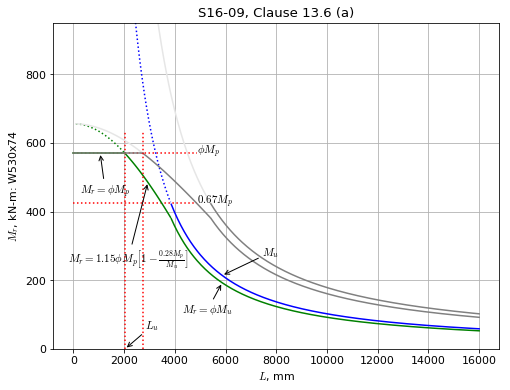

In [12]:
plt.rc('font',size=11)
plt.rc('mathtext',fontset='cm')
plt.figure(figsize=(8.,6.))
plt.grid(True)
plt.ylim((0.,1.5*Mp))

plt.plot([0.,L[j]+1000.],[phi*Mp,phi*Mp],'r:')
plt.annotate(s=r'$\phi M_p$',xy=(L[j]+1000.,phi*Mp))
plt.plot([0.,L[j]+1000.],[Me,Me],'r:')
plt.annotate(s=r'$0.67 M_p$',xy=(L[j]+1000.,Me))

plt.plot(L[:j],Mu[:j],'b:',L[j:],Mu[j:],'b-',L[j:],Mu[j:]*phi,'g')
m = np.where(L>=L[j]+2000.)[0][0]
plt.annotate(s=r'$M_u$',xy=(L[m],Mu[m]),
            xytext=(+40,+20),textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))
m = np.where(L>=L[j]+2000.)[0][0]
plt.annotate(s=r'$M_r=\phi M_u$',xy=(L[m],phi*Mu[m]),
            xytext=(-40.,-30),textcoords='offset points',
            arrowprops=dict(arrowstyle='->',))

plt.plot(L[:k],Mr[:k],'g:',L[k:j],Mr[k:j],'g-')
plt.plot([0.,L[k]],[phi*Mp,phi*Mp],'g-')

m = int((j+k)/2)
plt.annotate(s=r'$M_r=1.15 \phi M_p \left[1 - \frac{0.28 M_p}{M_u}\right]$',
             xy=(L[m],Mr[m]),
             xytext=(-80,-80),textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))
m = int(k/2)
plt.annotate(s=r'$M_r=\phi M_p$',xy=(L[m],phi*Mp),
            xytext=(-20,-40),textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

Lu = L[k]
plt.plot([Lu,Lu],[0.,Mp],'r:')
plt.annotate(s=r'$L_u$',xy=[Lu,0.],xytext=(20,20),textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

plt.ylabel(r'$M_r$, kN-m: '+Dsg)
plt.xlabel(r'$L$, mm')
plt.title(r'S16-09, Clause 13.6 (a)')

# compute Mu as a function of L
omega2 = 1.75
P = E*Iy*G*J
Q = (np.pi*E/L)**2*Iy*Cw
Mu2 = (omega2*np.pi/L)*np.sqrt(P+Q) * 1.E-6

j = np.where(Mu2<=Me)[0][0]   # index of first Mu <= 0.67 Mp
Mr2 = 1.15*phi*Mp*(1.-(0.28*Mp/Mu2[:j+1]))
k = np.where(Mr2<=phi*Mp)[0][0]  # index of first Mr <= phi Mp

plt.plot(L[:j],Mu2[:j],'0.9',L[j:],Mu2[j:],'0.5',L[j:],Mu2[j:]*phi,'0.5')
m = np.where(L>=L[j]+2000.)[0][0]
m = np.where(L>=L[j]+2000.)[0][0]
plt.plot(L[:k],Mr2[:k],'0.9',L[k:j],Mr2[k:j],'0.5')
plt.plot([0.,L[k]],[phi*Mp,phi*Mp],'0.5')
m = int((j+k)/2)
m = int(k/2)
Lu = L[k]
plt.plot([Lu,Lu],[0.,Mp],'r:')

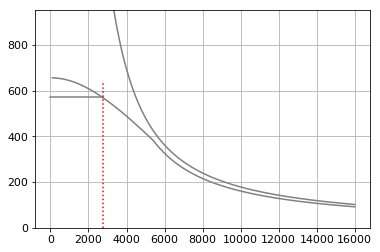